<a href="https://colab.research.google.com/github/jaiyeoba-1/Projects/blob/main/ConductSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('cleaned_dataset.csv')

# Preview the dataset
print(df.head())

        review_id  product_id  \
0  R34TTAFP8L6LLN  B0D6WB7BV6   
1   RZM2F3FFLUDL0  B0D6WB7BV6   
2  R20S61ZXL3M7J3  B0D6WB7BV6   
3  R1WP53KHLAFXUC  B0D6WB7BV6   
4  R2SUSKG5E9AHRZ  B0D6WB7BV6   

                                               title                 author  \
0  5.0 out of 5 stars Price check; Sound quality ...   Gary J and Stephan D   
1            5.0 out of 5 stars Great little speaker        Amazon Customer   
2  5.0 out of 5 stars Portable, Powerful, and Bui...  Claudia janeth Jaimes   
3  5.0 out of 5 stars Works Well in the Garage an...                 InMyHO   
4         5.0 out of 5 stars Great product from BOSE         Lynne A. Coyle   

   rating                                            content  \
0       5  I shopped for quite a bit to find this item at...   
1       5  I love this speaker. It's exactly what I neede...   
2       5  I’m thoroughly impressed with the Bose SoundLi...   
3       5  I wasn’t expecting much from something this si...   
4     

In [ ]:
# Create new columns for polarity and subjectivity
df['Polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview the updated dataset
print(df.head())

        review_id  product_id  \
0  R34TTAFP8L6LLN  B0D6WB7BV6   
1   RZM2F3FFLUDL0  B0D6WB7BV6   
2  R20S61ZXL3M7J3  B0D6WB7BV6   
3  R1WP53KHLAFXUC  B0D6WB7BV6   
4  R2SUSKG5E9AHRZ  B0D6WB7BV6   

                                               title                 author  \
0  5.0 out of 5 stars Price check; Sound quality ...   Gary J and Stephan D   
1            5.0 out of 5 stars Great little speaker        Amazon Customer   
2  5.0 out of 5 stars Portable, Powerful, and Bui...  Claudia janeth Jaimes   
3  5.0 out of 5 stars Works Well in the Garage an...                 InMyHO   
4         5.0 out of 5 stars Great product from BOSE         Lynne A. Coyle   

   rating                                            content  \
0       5  I shopped for quite a bit to find this item at...   
1       5  I love this speaker. It's exactly what I neede...   
2       5  I’m thoroughly impressed with the Bose SoundLi...   
3       5  I wasn’t expecting much from something this si...   
4     

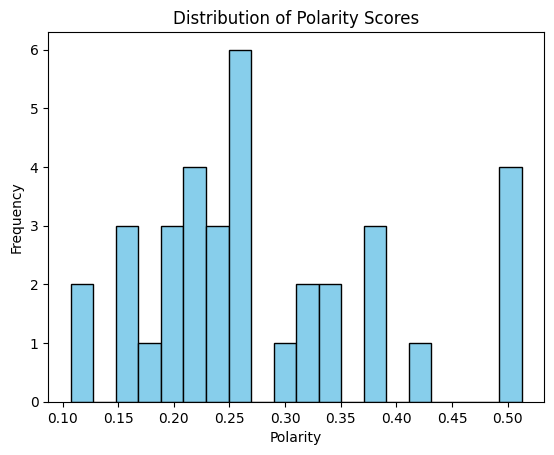

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of polarity
plt.hist(df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

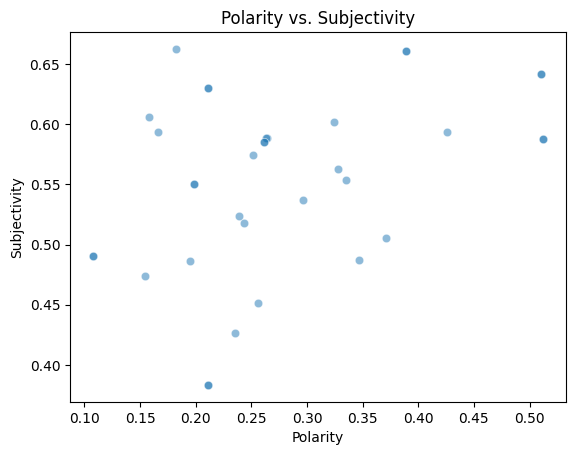

In [ ]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='Polarity', y='Subjectivity', data=df, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

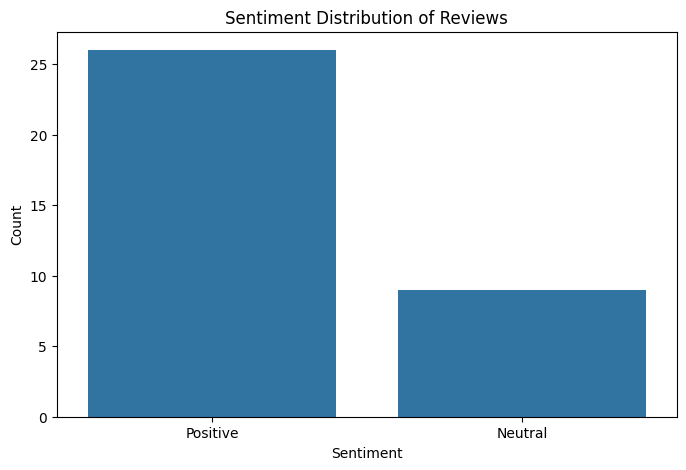

Sentiment
Positive    26
Neutral      9
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment values
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


print(df['Sentiment'].value_counts())

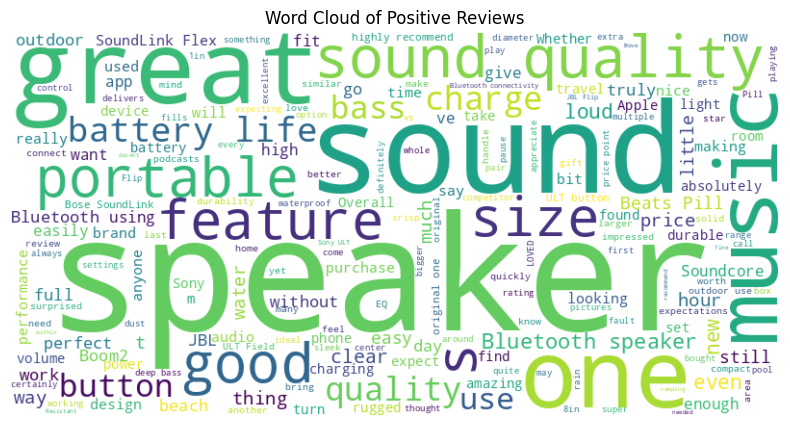

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [ ]:
# Save updated dataset
df.to_csv('cleaned_dataset.csv', index=False)